In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df = pd.read_csv('horse.csv')

In [3]:
df.shape

(299, 28)

In [4]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [5]:
target = df[['outcome']]
features = df.drop(columns='outcome')

In [6]:
target.head()

,outcome
0,died
1,euthanized
2,lived
3,died
4,died


In [7]:
features.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,distend_large,45.0,8.4,NaN,NaN,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,other,50.0,85.0,cloudy,2.0,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,normal,33.0,6.7,NaN,NaN,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,NaN,48.0,7.2,serosanguious,5.3,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,NaN,74.0,7.4,NaN,NaN,no,4300,0,0,no


In [8]:
features.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [9]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [10]:
num_col = [i for i in features.columns if features[i].dtype!='O']
cat_col = [i for i in features.columns if features[i].dtype=='O']

In [11]:
print('Numerical columns :','\n',num_col)
print('\n')
print('Catagerical columns :','\n',cat_col)

Numerical columns : 
 ['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3']


Catagerical columns : 
 ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion', 'cp_data']


In [12]:
features[cat_col].isnull().sum()

surgery                    0
age                        0
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
rectal_exam_feces        102
abdomen                  118
abdomo_appearance        165
surgical_lesion            0
cp_data                    0
dtype: int64

In [13]:
features[num_col].isnull().sum()

hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
nasogastric_reflux_ph    246
packed_cell_volume        29
total_protein             33
abdomo_protein           198
lesion_1                   0
lesion_2                   0
lesion_3                   0
dtype: int64

In [14]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.impute import SimpleImputer

In [15]:
features[cat_col]

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data
0,no,adult,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,decreased,distend_large,NaN,no,no
1,yes,adult,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,absent,other,cloudy,no,no
2,no,adult,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,normal,normal,NaN,no,yes
3,yes,young,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,NaN,serosanguious,yes,yes
4,no,adult,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,NaN,NaN,NaN,distend_large,NaN,no,no
295,no,adult,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,significant,none,absent,distend_small,serosanguious,yes,yes
296,yes,adult,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,slight,none,decreased,distend_large,NaN,yes,no
297,yes,adult,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,absent,distend_small,serosanguious,yes,yes


In [16]:
ord_enc = OrdinalEncoder()
df1 = pd.DataFrame(ord_enc.fit_transform(features[cat_col]),columns=cat_col)
df1.head()

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data
0,0.0,0.0,1.0,3.0,NaN,2.0,2.0,0.0,2.0,NaN,NaN,1.0,0.0,NaN,0.0,0.0
1,1.0,0.0,NaN,NaN,4.0,1.0,3.0,0.0,3.0,NaN,NaN,0.0,4.0,1.0,0.0,0.0
2,0.0,0.0,2.0,2.0,5.0,1.0,3.0,2.0,1.0,NaN,NaN,3.0,3.0,NaN,0.0,1.0
3,1.0,1.0,0.0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,NaN,2.0,1.0,1.0
4,0.0,0.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [17]:
simple = SimpleImputer(missing_values=np.nan,strategy='most_frequent')   
simple                          # Give anything mean,median or mode in most_frequent

SimpleImputer(strategy='most_frequent')

In [18]:
df2 = pd.DataFrame(simple.fit_transform(df1),columns=df1.columns)
df2.head()

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data
0,0.0,0.0,1.0,3.0,3.0,2.0,2.0,0.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,2.0,4.0,1.0,3.0,0.0,3.0,2.0,2.0,0.0,4.0,1.0,0.0,0.0
2,0.0,0.0,2.0,2.0,5.0,1.0,3.0,2.0,1.0,2.0,2.0,3.0,3.0,1.0,0.0,1.0
3,1.0,1.0,0.0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
4,0.0,0.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0


In [19]:
#df.isnull().sum()
#df1.isnull().sum()
df2.isnull().sum()

surgery                  0
age                      0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
abdomo_appearance        0
surgical_lesion          0
cp_data                  0
dtype: int64

In [20]:
simple1 = SimpleImputer(missing_values=np.nan,strategy='median')

In [21]:
df3 = pd.DataFrame(simple1.fit_transform(features[num_col]),columns=num_col)
df3.head()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,530101.0,38.5,66.0,28.0,5.0,45.0,8.4,2.3,11300.0,0.0,0.0
1,534817.0,39.2,88.0,20.0,5.0,50.0,85.0,2.0,2208.0,0.0,0.0
2,530334.0,38.3,40.0,24.0,5.0,33.0,6.7,2.3,0.0,0.0,0.0
3,5290409.0,39.1,164.0,84.0,5.0,48.0,7.2,5.3,2208.0,0.0,0.0
4,530255.0,37.3,104.0,35.0,5.0,74.0,7.4,2.3,4300.0,0.0,0.0


In [22]:
df3.isnull().sum()

hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
nasogastric_reflux_ph    0
packed_cell_volume       0
total_protein            0
abdomo_protein           0
lesion_1                 0
lesion_2                 0
lesion_3                 0
dtype: int64

In [23]:
std_sca = StandardScaler()
df4 = pd.DataFrame(simple1.fit_transform(features[num_col]),columns=num_col)
df4.head()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,530101.0,38.5,66.0,28.0,5.0,45.0,8.4,2.3,11300.0,0.0,0.0
1,534817.0,39.2,88.0,20.0,5.0,50.0,85.0,2.0,2208.0,0.0,0.0
2,530334.0,38.3,40.0,24.0,5.0,33.0,6.7,2.3,0.0,0.0,0.0
3,5290409.0,39.1,164.0,84.0,5.0,48.0,7.2,5.3,2208.0,0.0,0.0
4,530255.0,37.3,104.0,35.0,5.0,74.0,7.4,2.3,4300.0,0.0,0.0


In [24]:
features_new = pd.concat([df2,df3],axis=1)
features_new

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,...,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,0.0,0.0,1.0,3.0,3.0,2.0,2.0,0.0,2.0,2.0,...,38.5,66.0,28.0,5.0,45.0,8.4,2.3,11300.0,0.0,0.0
1,1.0,0.0,1.0,2.0,4.0,1.0,3.0,0.0,3.0,2.0,...,39.2,88.0,20.0,5.0,50.0,85.0,2.0,2208.0,0.0,0.0
2,0.0,0.0,2.0,2.0,5.0,1.0,3.0,2.0,1.0,2.0,...,38.3,40.0,24.0,5.0,33.0,6.7,2.3,0.0,0.0,0.0
3,1.0,1.0,0.0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,...,39.1,164.0,84.0,5.0,48.0,7.2,5.3,2208.0,0.0,0.0
4,0.0,0.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,...,37.3,104.0,35.0,5.0,74.0,7.4,2.3,4300.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,0.0,0.0,2.0,4.0,2.0,1.0,0.0,1.0,2.0,...,38.2,120.0,70.0,5.0,55.0,65.0,2.3,3205.0,0.0,0.0
295,0.0,0.0,1.0,1.0,4.0,2.0,4.0,2.0,0.0,1.0,...,37.2,72.0,24.0,5.0,44.0,7.5,3.3,2208.0,0.0,0.0
296,1.0,0.0,0.0,3.0,4.0,1.0,4.0,0.0,0.0,2.0,...,37.5,72.0,30.0,5.0,60.0,6.8,2.3,3205.0,0.0,0.0
297,1.0,0.0,1.0,3.0,5.0,1.0,3.0,2.0,0.0,1.0,...,36.5,100.0,24.0,5.0,50.0,6.0,3.4,2208.0,0.0,0.0


In [25]:
def outlier_capping(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    df[column] = df[column].apply(lambda x: lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
for col in df.select_dtypes(include = ['float','int']).columns:
    outlier_capping(features_new,col)

In [26]:
features_new.shape

(299, 27)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(features_new,target,train_size=0.75,random_state=100)
print(x_train.shape)

(224, 27)


## Bagging_Classifier

In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings('ignore')

In [29]:
bag_class = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=50,bootstrap=True,
                             max_samples=0.9,max_features=0.9,random_state=50,oob_score=True)

In [30]:
bag_class.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=0.9,
                  max_samples=0.9, n_estimators=50, oob_score=True,
                  random_state=50)

In [31]:
bag_class.oob_score_

0.7008928571428571

In [32]:
y_pred = bag_class.predict(x_test)

In [33]:
accuracy_score(y_test,y_pred)

0.7333333333333333

### Random Foresr

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rand_forest = RandomForestClassifier(n_estimators=100,max_features='sqrt',max_samples=0.9,
                                     bootstrap=True,oob_score=True,random_state=50)

In [36]:
rand_forest.fit(x_train,y_train)

RandomForestClassifier(max_samples=0.9, oob_score=True, random_state=50)

In [37]:
rand_forest.oob_score_

0.7098214285714286

In [38]:
y_pred1 = rand_forest.predict(x_test)

In [39]:
accuracy_score(y_test,y_pred1)

0.72

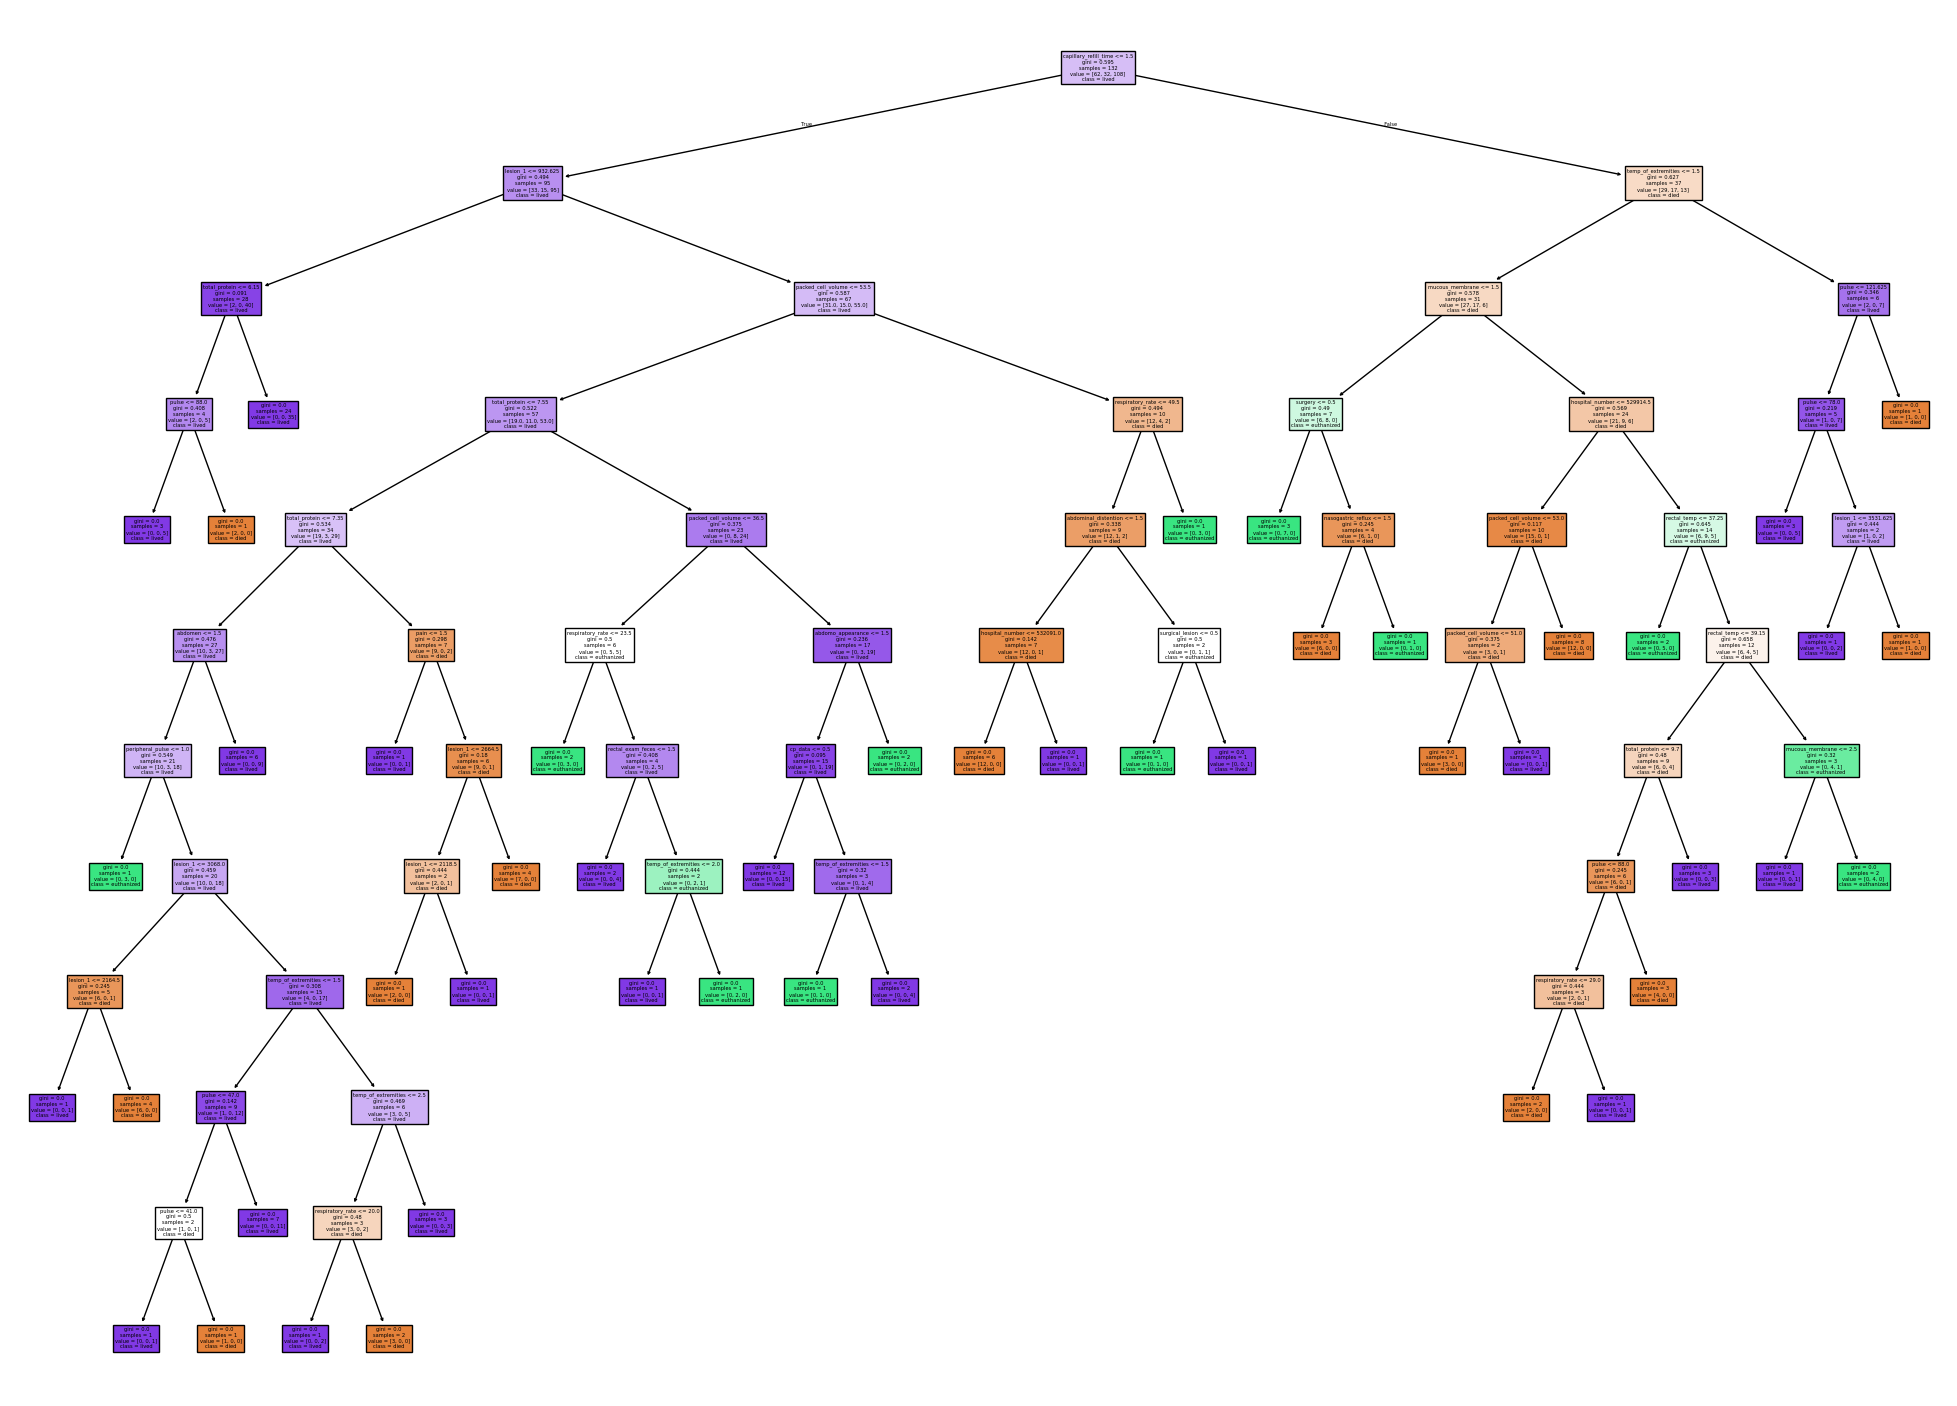

In [40]:
plt.figure(figsize=(25,18))
plot_tree(rand_forest.estimators_[99],filled=True,feature_names=list(features_new),
          class_names=list(target.outcome.unique()))        # max_depth=4
plt.show()

In [41]:
# y_train['predicted'] = pd.DataFrame(y_pred1)
# y_train

## Gradient_Boost

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
grad_boost = GradientBoostingClassifier(n_estimators=100,learning_rate=0.5,subsample=0.9,
                                        max_features=0.9)

In [44]:
grad_boost.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, max_features=0.9, subsample=0.9)

In [45]:
y_pred2 = grad_boost.predict(x_test)

In [46]:
accuracy_score(y_test,y_pred2)

0.72

## XGBoost

In [47]:
!pip install xgboost

In [64]:
import xgboost as xgb

In [68]:
xg_boost = xgb.XGBClassifier(n_estimators=100,learning_rate=0.5,min_child_weight=2,
                            reg_alpha=10,reg_lambda=10)

In [76]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)

In [72]:
xg_boost.fit(x_train, y_train)
print(xg_boost)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [74]:
y_pred = xg_boost.predict(x_test)

In [75]:
accuracy_score(y_test,y_pred)

0.72

In [54]:
!pip install lightgbm

In [55]:
import lightgbm as lgb

In [58]:
light_gbm = lgb.LGBMClassifier(n_estimators=100,learning_rate=0.5,min_child_weight=2,reg_alpha=10,
                              reg_lambda=10,subsample=0.9,max_features=0.9,boosting_type='goss',
                              top_rate=0.2,other_rate=0.3,min_bins=20)

LGBMClassifier(boosting_type='goss', learning_rate=0.5, max_features=0.9,
               min_bins=20, min_child_weight=2, other_rate=0.3, reg_alpha=10,
               reg_lambda=10, subsample=0.9, top_rate=0.2)

In [60]:
light_gbm.fit(x_train,y_train)

[LightGBM] [Warning] Unknown parameter: min_bins
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Unknown parameter: min_bins
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 289
[LightGBM] [Info] Number of data points in the train set: 224, number of used features: 22
[LightGBM] [Info] Us

LGBMClassifier(boosting_type='goss', learning_rate=0.5, max_features=0.9,
               min_bins=20, min_child_weight=2, other_rate=0.3, reg_alpha=10,
               reg_lambda=10, subsample=0.9, top_rate=0.2)

In [61]:
y_pred3 = light_gbm.predict(x_test)

[LightGBM] [Warning] Unknown parameter: min_bins
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


In [62]:
accuracy_score(y_test,y_pred3)

0.7333333333333333